--- Machine Learning Project: Indian Healthcare - Diabetes Prediction ---
Libraries imported successfully.

--- 1. Data Loading (Simulated Dataset) ---
Simulated Indian healthcare dataset for diabetes prediction created successfully.
Total patient records: 300
Diabetes status distribution:
Diabetes
1    169
0    131
Name: count, dtype: int64

--- 2. Data Exploration (EDA) ---

First 5 rows of the dataset (features):
   Age  Gender   BMI  Glucose_mg_dL  BloodPressure_mmHg  Insulin_mu_U_mL  \
0   38    Male  42.9          120.8               114.0             59.8   
1   63    Male  28.9          216.2               149.0            222.5   
2   69    Male  25.6          249.6                91.9            283.4   
3   69  Female  37.6          153.1               112.0            260.6   
4   25    Male  21.8          239.3               136.0             76.0   

   DiabetesPedigreeFunction  Pregnancies Smoker  PhysicalActivity_hours_week  
0                     0.519            0    

C:\Users\Debarun\AppData\Local\Temp\ipykernel_7284\2833327303.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


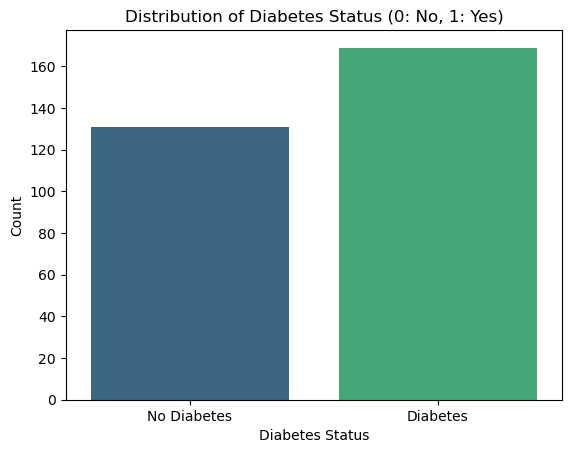

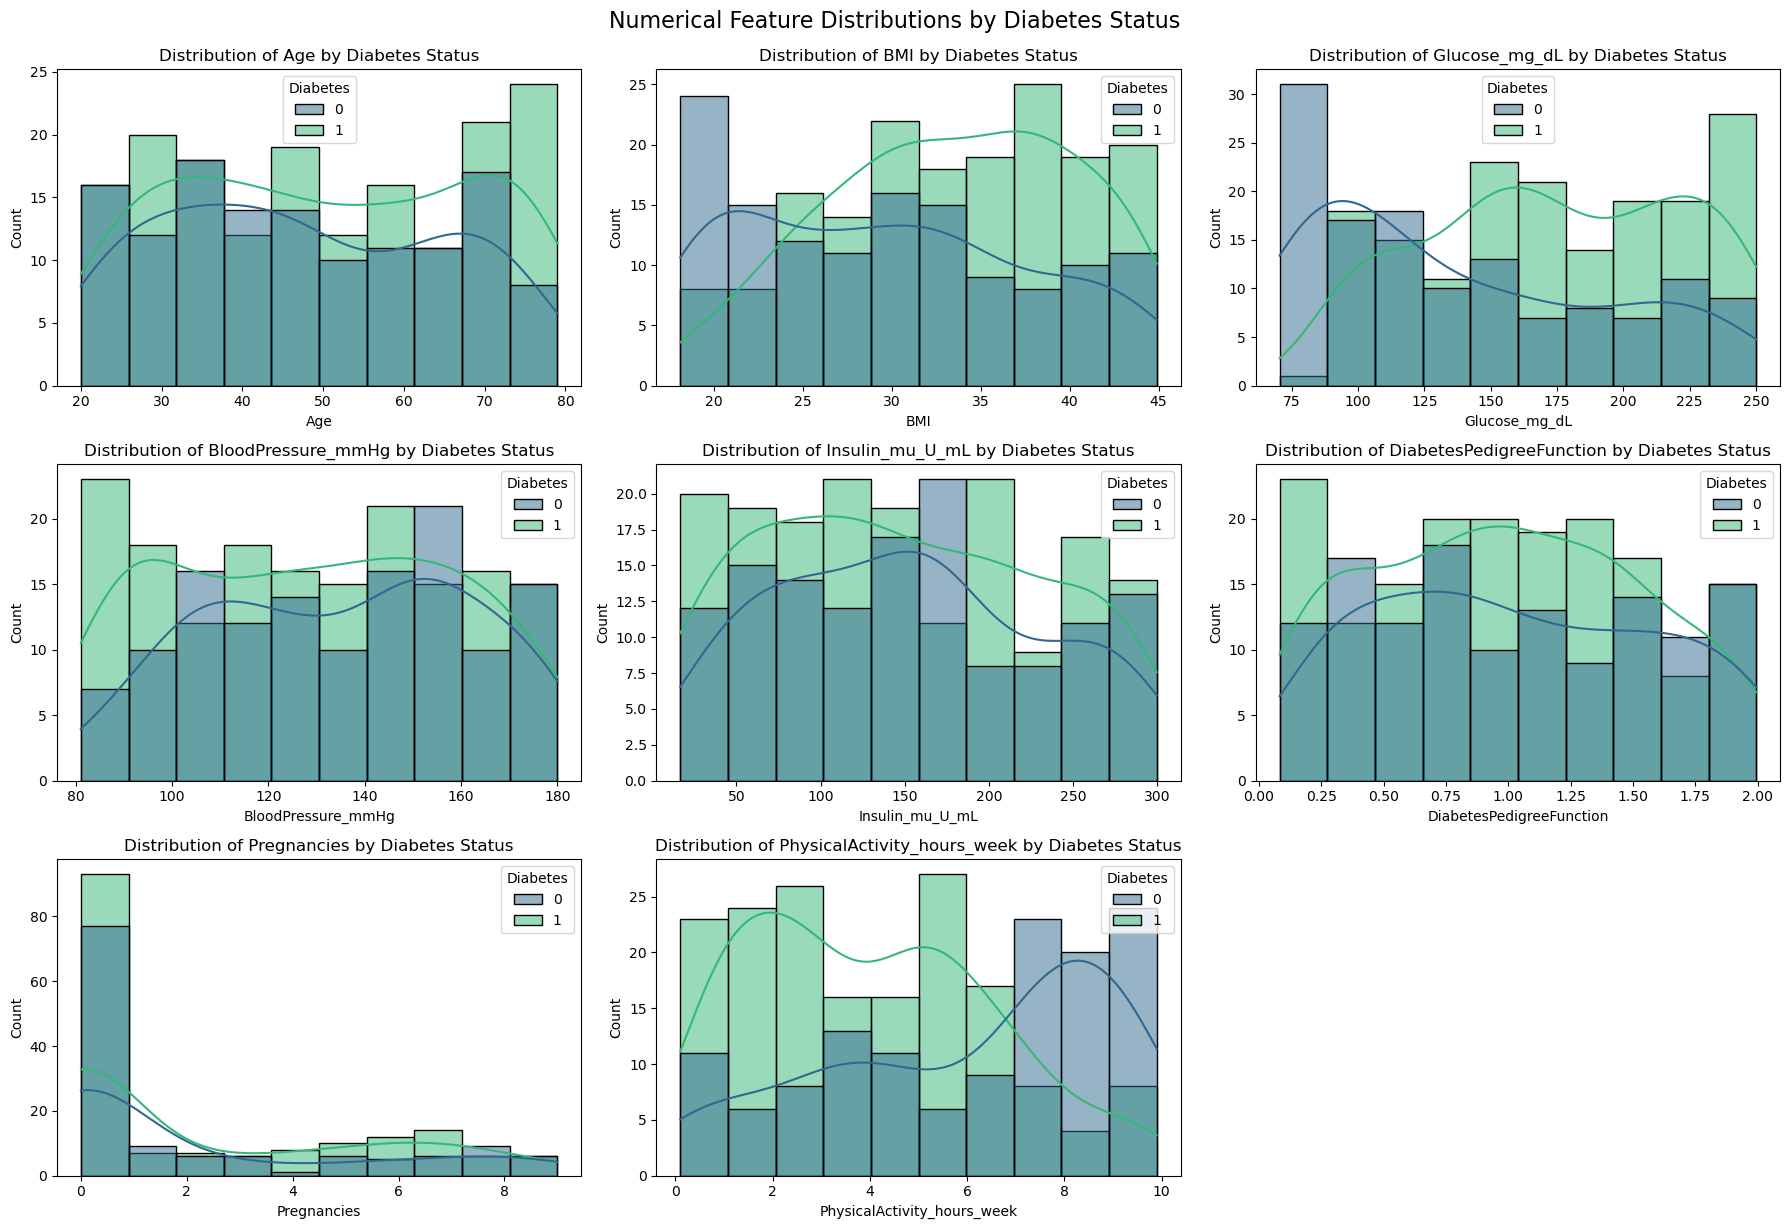

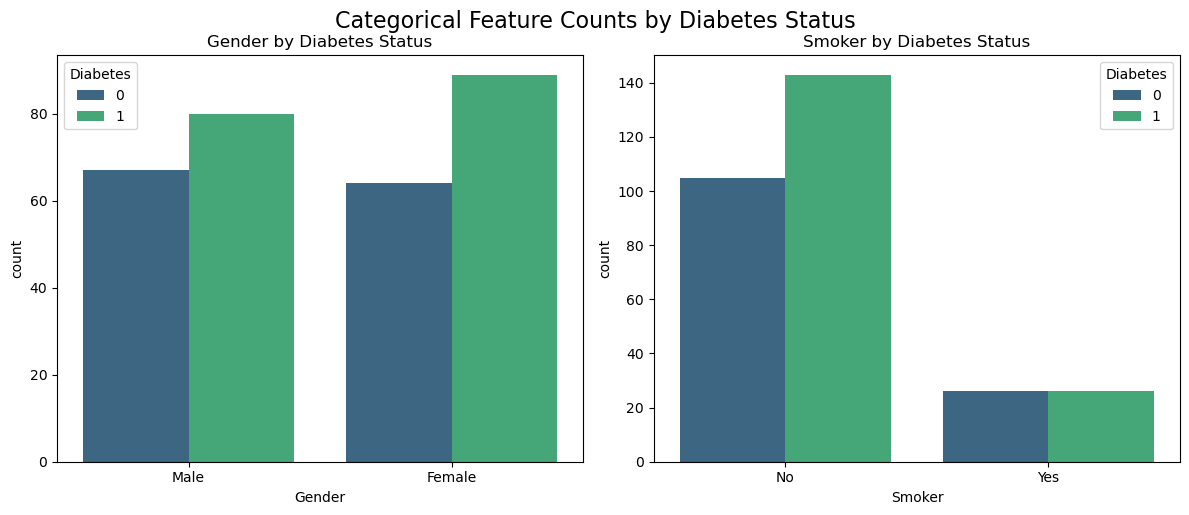


--- 3. Data Preprocessing ---
No missing values found in the dataset.

Applying preprocessing (scaling numerical, one-hot encoding categorical)...
Features preprocessed successfully.
Shape of processed data: (300, 12)

--- 4. Splitting Data ---
Training set size (features): (240, 12)
Testing set size (features): (60, 12)
Training set size (target): (240,)
Testing set size (target): (60,)

--- 5. Model Selection and Training ---
Training RandomForestClassifier model...
Model training complete.

--- 6. Model Evaluation ---

Accuracy Score: 0.7833

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.70      0.88      0.78        26
    Diabetes       0.89      0.71      0.79        34

    accuracy                           0.78        60
   macro avg       0.79      0.80      0.78        60
weighted avg       0.81      0.78      0.78        60


Confusion Matrix:
[[23  3]
 [10 24]]


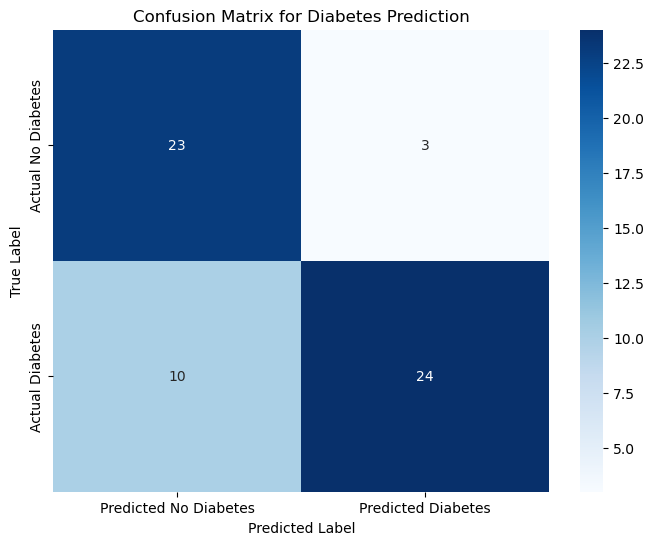


ROC AUC Score: 0.9101


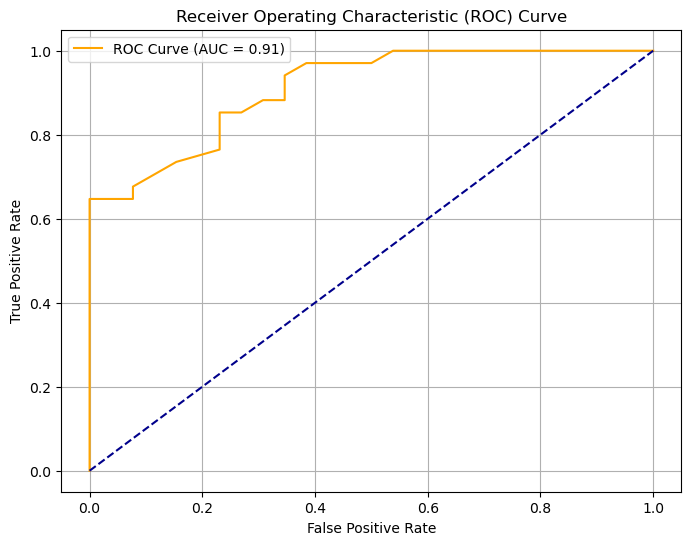


--- 7. Making Predictions with New Data ---

Hypothetical new patient features:
   Age  Gender   BMI  Glucose_mg_dL  BloodPressure_mmHg  Insulin_mu_U_mL  \
0   45  Female  32.5          165.0               130.0            180.0   

   DiabetesPedigreeFunction  Pregnancies Smoker  PhysicalActivity_hours_week  
0                      0.65            2     No                          3.0  

Predicted probability of diabetes: 0.8700
Predicted diabetes status for the new patient: likely has diabetes

--- Project Complete ---
This project demonstrates a basic machine learning workflow for a binary classification task:
1. Data Loading (with a simulated dataset of Indian healthcare parameters)
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing (Missing Value Handling, Feature Scaling, One-Hot Encoding)
4. Data Splitting (Train/Test)
5. Model Selection and Training (RandomForestClassifier)
6. Model Evaluation (Accuracy, Classification Report, Confusion Matrix, ROC AUC)
7. Making Predict

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # A robust classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Machine Learning Project: Indian Healthcare - Diabetes Prediction ---")
print("Libraries imported successfully.")

# --- 1. Data Loading (Simulated Indian Healthcare Dataset for Diabetes) ---
# We'll create a synthetic dataset mimicking health parameters relevant to diabetes prediction in India.
print("\n--- 1. Data Loading (Simulated Dataset) ---")

data = {
    'PatientID': range(1, 301),
    'Age': np.random.randint(20, 80, 300),
    'Gender': np.random.choice(['Male', 'Female'], 300),
    'BMI': np.random.uniform(18.0, 45.0, 300).round(1), # Body Mass Index
    'Glucose_mg_dL': np.random.uniform(70, 250, 300).round(1), # Fasting glucose level
    'BloodPressure_mmHg': np.random.uniform(80, 180, 300).round(1), # Diastolic blood pressure
    'Insulin_mu_U_mL': np.random.uniform(15, 300, 300).round(1), # Insulin level
    'DiabetesPedigreeFunction': np.random.uniform(0.08, 2.0, 300).round(3), # Genetic predisposition score
    'Pregnancies': np.random.randint(0, 10, 300), # Number of pregnancies (relevant for females)
    'Smoker': np.random.choice(['Yes', 'No'], 300, p=[0.2, 0.8]),
    'PhysicalActivity_hours_week': np.random.uniform(0, 10, 300).round(1), # Hours of physical activity per week
    'Diabetes': np.random.choice([0, 1], 300, p=[0.75, 0.25]) # Target: 0 for No Diabetes, 1 for Diabetes
}

df = pd.DataFrame(data)

# Introduce some correlation for realism:
# Higher BMI, Glucose, Blood Pressure, Insulin, DPF, and Age tend to increase diabetes risk.
# Smoking also increases risk. Physical activity decreases risk.
df['Diabetes'] = df.apply(lambda row: 1 if (row['Glucose_mg_dL'] > 140 and np.random.rand() < 0.8) or \
                                            (row['BMI'] > 30 and np.random.rand() < 0.6) or \
                                            (row['Age'] > 50 and np.random.rand() < 0.5) or \
                                            (row['Smoker'] == 'Yes' and np.random.rand() < 0.4) or \
                                            (row['PhysicalActivity_hours_week'] < 2 and np.random.rand() < 0.3) \
                                            else row['Diabetes'], axis=1)
# Ensure some non-diabetic cases remain even with high risk factors
df['Diabetes'] = df.apply(lambda row: 0 if (row['Glucose_mg_dL'] < 90 and np.random.rand() < 0.9) or \
                                            (row['BMI'] < 22 and np.random.rand() < 0.8) or \
                                            (row['PhysicalActivity_hours_week'] > 7 and np.random.rand() < 0.7) \
                                            else row['Diabetes'], axis=1)

# Adjust 'Pregnancies' for males to 0
df.loc[df['Gender'] == 'Male', 'Pregnancies'] = 0

# Drop PatientID as it's not a predictive feature
X = df.drop(['PatientID', 'Diabetes'], axis=1)
y = df['Diabetes']

print("Simulated Indian healthcare dataset for diabetes prediction created successfully.")
print(f"Total patient records: {len(df)}")
print(f"Diabetes status distribution:\n{y.value_counts()}")

# --- 2. Data Exploration (EDA - Exploratory Data Analysis) ---
print("\n--- 2. Data Exploration (EDA) ---")
print("\nFirst 5 rows of the dataset (features):")
print(X.head())

print("\nDataset Info (data types, non-null counts):")
X.info()

print("\nDescriptive Statistics (numerical features):")
print(X.describe())

print("\nValue counts for categorical features:")
for col in X.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{X[col].value_counts()}")

print("\nTarget variable (Diabetes) distribution:")
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Diabetes Status (0: No, 1: Yes)')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

# Visualize distributions of numerical features by Diabetes status
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='Diabetes', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Diabetes Status')
plt.tight_layout()
plt.suptitle('Numerical Feature Distributions by Diabetes Status', y=1.02, fontsize=16)
plt.show()

# Visualize count plots for categorical features by Diabetes status
categorical_features = X.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(data=df, x=feature, hue='Diabetes', palette='viridis')
    plt.title(f'{feature} by Diabetes Status')
    plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.suptitle('Categorical Feature Counts by Diabetes Status', y=1.02, fontsize=16)
plt.show()


# --- 3. Data Preprocessing ---
print("\n--- 3. Data Preprocessing ---")

# Check for missing values (unlikely in a dummy dataset)
if X.isnull().sum().sum() > 0:
    print("Missing values found. Handling them (imputing with mode/mean for simplicity)...")
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col].fillna(X[col].mode()[0], inplace=True)
        else:
            X[col].fillna(X[col].mean(), inplace=True)
    print("Missing values imputed.")
else:
    print("No missing values found in the dataset.")

# Identify numerical and categorical features for separate preprocessing
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

print("\nApplying preprocessing (scaling numerical, one-hot encoding categorical)...")
X_processed = preprocessor.fit_transform(X)
print("Features preprocessed successfully.")
print(f"Shape of processed data: {X_processed.shape}")


# --- 4. Splitting Data into Training and Testing Sets ---
print("\n--- 4. Splitting Data ---")
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
# test_size=0.2 means 20% of data for testing, 80% for training
# random_state for reproducibility
# stratify=y ensures balanced class distribution in train/test sets

print(f"Training set size (features): {X_train.shape}")
print(f"Testing set size (features): {X_test.shape}")
print(f"Training set size (target): {y_train.shape}")
print(f"Testing set size (target): {y_test.shape}")

# --- 5. Model Selection and Training ---
print("\n--- 5. Model Selection and Training ---")
# Using RandomForestClassifier, a powerful ensemble model for classification
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # 100 trees, balanced for imbalanced data

print(f"Training {type(model).__name__} model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 6. Model Evaluation ---
print("\n--- 6. Model Evaluation ---")
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (Diabetes=1)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print("\nClassification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual No Diabetes', 'Actual Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

# ROC Curve and AUC Score
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print(f"\nROC AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- 7. Making Predictions with New Data ---
print("\n--- 7. Making Predictions with New Data ---")

# Let's create a hypothetical new patient's data
# IMPORTANT: The new data must have the same column names and order as the original X
new_patient_data = {
    'Age': [45],
    'Gender': ['Female'],
    'BMI': [32.5],
    'Glucose_mg_dL': [165.0],
    'BloodPressure_mmHg': [130.0],
    'Insulin_mu_U_mL': [180.0],
    'DiabetesPedigreeFunction': [0.65],
    'Pregnancies': [2],
    'Smoker': ['No'],
    'PhysicalActivity_hours_week': [3.0]
}
new_patient_df = pd.DataFrame(new_patient_data)

print("\nHypothetical new patient features:")
print(new_patient_df)

# Preprocess the new data using the *fitted* preprocessor
new_patient_processed = preprocessor.transform(new_patient_df)

# Predict the diabetes probability and class
diabetes_probability = model.predict_proba(new_patient_processed)[:, 1][0]
predicted_diabetes = model.predict(new_patient_processed)[0]

diabetes_status = "likely has diabetes" if predicted_diabetes == 1 else "likely does not have diabetes"

print(f"\nPredicted probability of diabetes: {diabetes_probability:.4f}")
print(f"Predicted diabetes status for the new patient: {diabetes_status}")

print("\n--- Project Complete ---")
print("This project demonstrates a basic machine learning workflow for a binary classification task:")
print("1. Data Loading (with a simulated dataset of Indian healthcare parameters)")
print("2. Exploratory Data Analysis (EDA)")
print("3. Data Preprocessing (Missing Value Handling, Feature Scaling, One-Hot Encoding)")
print("4. Data Splitting (Train/Test)")
print("5. Model Selection and Training (RandomForestClassifier)")
print("6. Model Evaluation (Accuracy, Classification Report, Confusion Matrix, ROC AUC)")
print("7. Making Predictions on new patient data")
